#**Air Quality Disparities in NYC: A Multi-Pollutant Analysis**
Objective:
To examine how air pollution levels specifically nitrogen dioxide (NO₂), particulate matter (PM2.5), and ozone (O₃) have changed over time across New York City. The goal is to understand broader air quality trends and explore potential disparities that may reflect environmental inequality.
# RPAD 676: Data Science for the Public Good

## Author: Shristi Das
## Date: 12th April 2025



In [5]:
import pandas as pd

# Load and prepare data
df = pd.read_csv("Air_Quality.csv")
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
df['Year'] = df['Start_Date'].dt.year  # Create 'Year' column

# Now safe to group by Year
df.groupby(['Year', 'Name'])['Data Value'].count().unstack().fillna(0)



Name,Annual vehicle miles traveled,Annual vehicle miles traveled (cars),Annual vehicle miles traveled (trucks),Asthma emergency department visits due to PM2.5,Asthma emergency departments visits due to Ozone,Asthma hospitalizations due to Ozone,Boiler Emissions- Total NOx Emissions,Boiler Emissions- Total PM2.5 Emissions,Boiler Emissions- Total SO2 Emissions,Cardiac and respiratory deaths due to Ozone,Cardiovascular hospitalizations due to PM2.5 (age 40+),Deaths due to PM2.5,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Outdoor Air Toxics - Benzene,Outdoor Air Toxics - Formaldehyde,Ozone (O3),Respiratory hospitalizations due to PM2.5 (age 20+)
Year,,,,,,,,,,,,,,,,,,
2005,107.0,107.0,107.0,96.0,96.0,96.0,0.0,0.0,0.0,48.0,48.0,48.0,0.0,0.0,48.0,48.0,0.0,48.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.0,282.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,96.0,96.0,96.0,0.0,0.0,0.0,48.0,48.0,48.0,423.0,423.0,0.0,0.0,141.0,48.0
2010,107.0,107.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,423.0,423.0,0.0,0.0,141.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,423.0,423.0,107.0,107.0,141.0,0.0
2012,0.0,0.0,0.0,96.0,96.0,96.0,0.0,0.0,0.0,48.0,48.0,48.0,423.0,423.0,0.0,0.0,141.0,48.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,48.0,48.0,48.0,0.0,0.0,0.0,423.0,423.0,0.0,0.0,141.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.0,282.0,48.0,48.0,141.0,0.0
2015,0.0,0.0,0.0,96.0,96.0,96.0,48.0,48.0,48.0,48.0,48.0,48.0,564.0,564.0,0.0,0.0,141.0,48.0


### Filtering Key Air Pollutants

For this analysis, we focus on three major pollutants with well-known public health implications: NO₂, PM2.5, and O₃. These are commonly monitored in urban environments and are linked to asthma, cardiovascular disease, and overall air quality.


In [6]:
# Filter for 3 key pollutants
key_pollutants = [
    'Nitrogen dioxide (NO2)',
    'Fine particles (PM 2.5)',
    'Ozone (O3)'
]

df_pollutants = df[df['Name'].isin(key_pollutants)].copy()


### Yearly Trends in Major Pollutants

The chart below shows how the average levels of NO₂, PM2.5, and O₃ have changed each year from 2014 to 2017. This visualization helps to assess whether air quality is improving over time and whether these pollutants follow similar or different patterns.



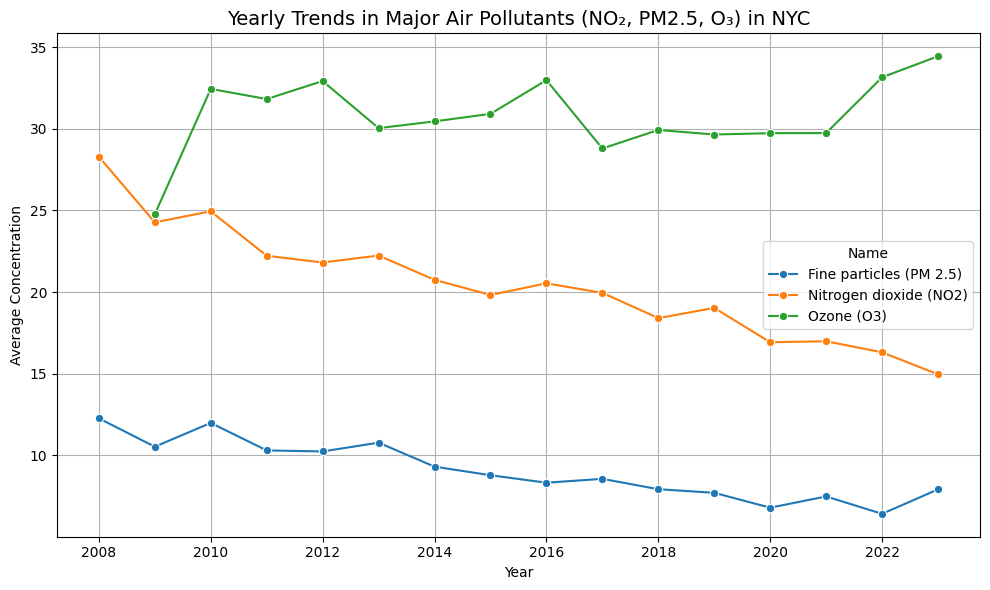

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and calculate yearly averages for each pollutant
pollutant_trends = df_pollutants.groupby(['Year', 'Name'])['Data Value'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=pollutant_trends, x='Year', y='Data Value', hue='Name', marker='o')

plt.title("Yearly Trends in Major Air Pollutants (NO₂, PM2.5, O₃) in NYC", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Concentration")
plt.grid(True)
plt.tight_layout()
plt.show()


The trends show that NO₂ and PM2.5 levels have declined over time, suggesting improvements in NYC’s air quality for these pollutants. O₃ levels are more variable, reflecting seasonal and atmospheric influences. Together, these trends provide insight into urban air pollution patterns and support ongoing efforts to reduce emissions and protect public health.


### Borough-Level Comparison of Air Pollutants

This bar chart shows the average concentrations of NO₂, PM2.5, and O₃ across New York City boroughs.


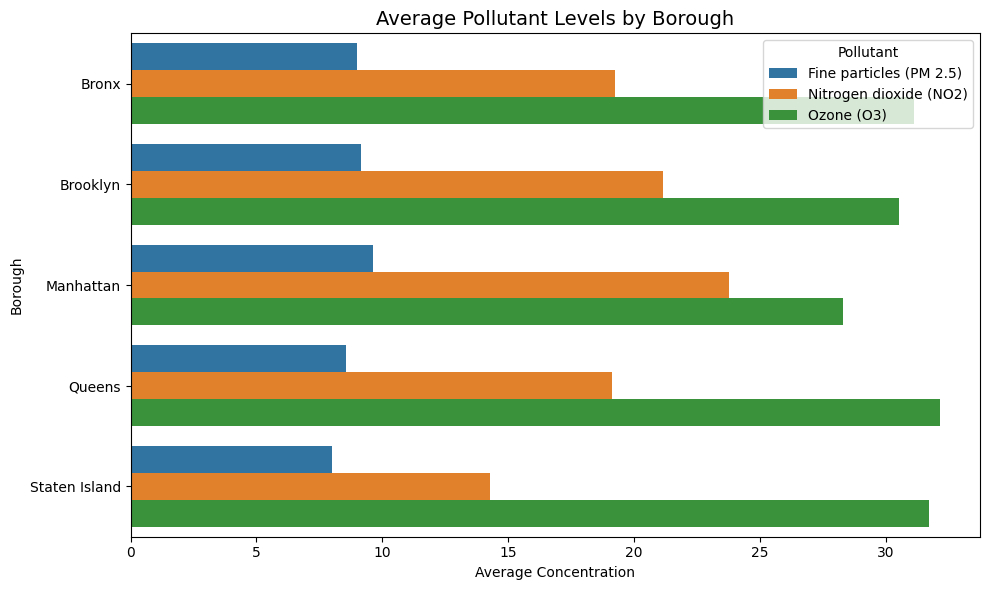

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to assign boroughs
def assign_borough(name):
    name = str(name).lower()
    if "bronx" in name:
        return "Bronx"
    elif "brooklyn" in name:
        return "Brooklyn"
    elif "manhattan" in name or "harlem" in name or "inwood" in name or "upper west" in name:
        return "Manhattan"
    elif "queens" in name or "jamaica" in name or "flushing" in name or "astoria" in name:
        return "Queens"
    elif "staten island" in name or "tottenville" in name or "st. george" in name:
        return "Staten Island"
    else:
        return None

# Apply borough mapping
df_pollutants['Borough'] = df_pollutants['Geo Place Name'].apply(assign_borough)

# Remove rows without borough assignment
df_borough = df_pollutants.dropna(subset=['Borough'])

# Group by Borough and Pollutant, compute mean
borough_avg = df_borough.groupby(['Borough', 'Name'])['Data Value'].mean().reset_index()

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=borough_avg, x='Data Value', y='Borough', hue='Name')

plt.title("Average Pollutant Levels by Borough", fontsize=14)
plt.xlabel("Average Concentration")
plt.ylabel("Borough")
plt.legend(title="Pollutant")
plt.tight_layout()
plt.show()



Manhattan and the Bronx appear to have higher concentrations of NO₂ and PM2.5, which may reflect higher traffic density and building emissions. O₃ levels are more consistent across boroughs, reflecting broader atmospheric dispersion. These disparities highlight how environmental burdens are unevenly distributed in urban spaces and suggest a need for borough-specific interventions.

### Trends in Pollutant Levels (Stacked Area Chart)

This chart illustrates how the composition of major air pollutants NO₂, PM2.5, and O₃ has changed over time in New York City.


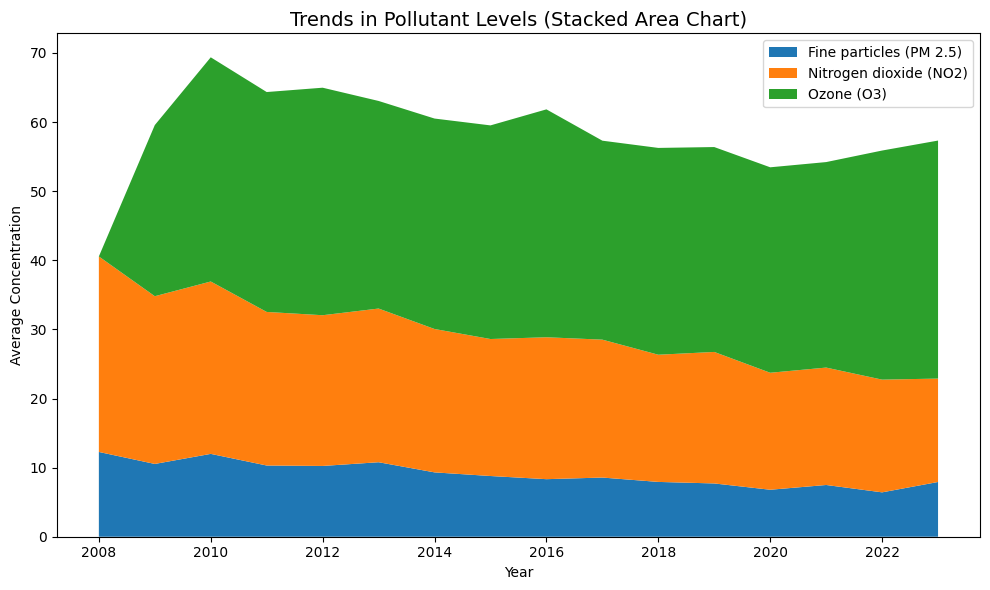

In [9]:
# Pivot the dataset to wide format for stacking
pivot_area = df_pollutants.pivot_table(
    index='Year',
    columns='Name',
    values='Data Value',
    aggfunc='mean'
)

# Fill missing values with 0 and sort by year
pivot_area = pivot_area.fillna(0).sort_index()

# Plot the stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(pivot_area.index, pivot_area.T, labels=pivot_area.columns)

plt.title("Trends in Pollutant Levels (Stacked Area Chart)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Concentration")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Borough-Wise NO₂ Trends

This chart shows how average nitrogen dioxide (NO₂) levels have changed across NYC’s boroughs over time. Boroughs were automatically assigned using keyword matching from the `Geo Place Name` column (e.g., “Harlem” → Manhattan). The dataset was then grouped by both `Year` and `Borough`, and average NO₂ concentrations were calculated to visualize year-by-year trends across the city.




<ipython-input-10-11f3ebacd0ae>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_borough['Year'] = df_borough['Start_Date'].dt.year


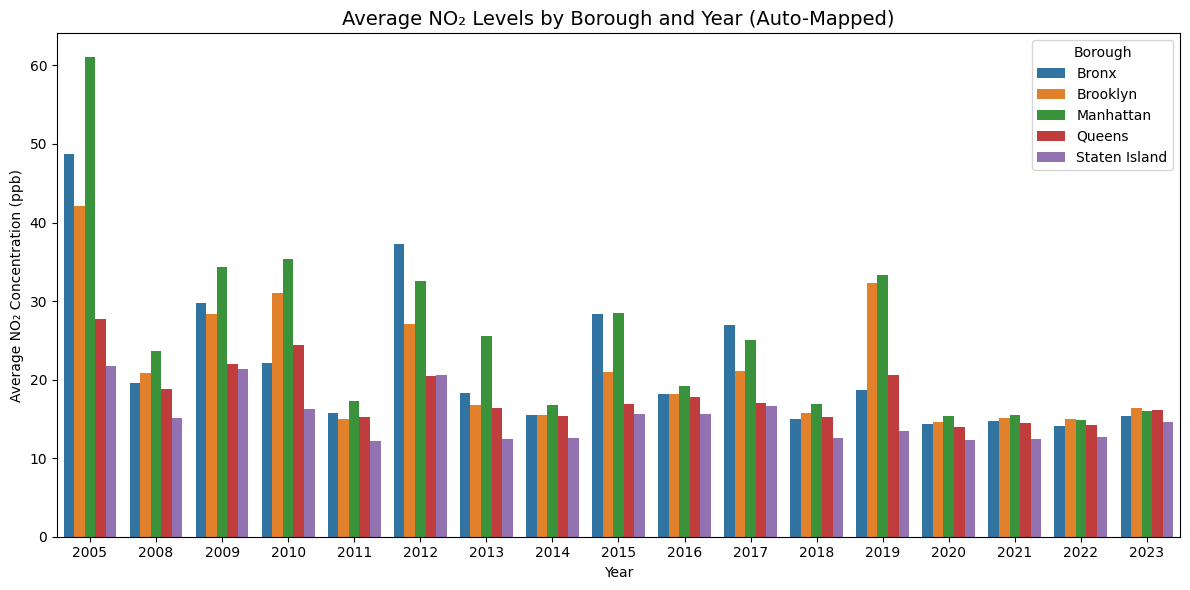

In [10]:
# Extract year from Start_Date
# Reload the dataset to ensure a clean slate
df = pd.read_csv("Air_Quality.csv")

# Convert Start_Date to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

# Automatically assign boroughs based on keywords
def assign_borough(name):
    name = str(name).lower()
    if "bronx" in name:
        return "Bronx"
    elif "brooklyn" in name:
        return "Brooklyn"
    elif "manhattan" in name or "harlem" in name or "inwood" in name or "upper west" in name or "lower east" in name:
        return "Manhattan"
    elif "queens" in name or "jamaica" in name or "flushing" in name or "astoria" in name or "ridgewood" in name:
        return "Queens"
    elif "staten island" in name or "tottenville" in name or "st. george" in name:
        return "Staten Island"
    else:
        return None

# Apply automatic borough assignment
df['Borough'] = df['Geo Place Name'].apply(assign_borough)

# Drop rows without a matched borough
df_borough = df.dropna(subset=['Borough'])

# Extract year and group by both year and borough
df_borough['Year'] = df_borough['Start_Date'].dt.year
borough_yearly_avg = df_borough.groupby(['Year', 'Borough'])['Data Value'].mean().reset_index()

# Plot: grouped bar chart of average NO2 by borough over time
plt.figure(figsize=(12, 6))
sns.barplot(data=borough_yearly_avg, x='Year', y='Data Value', hue='Borough')

plt.title("Average NO₂ Levels by Borough and Year (Auto-Mapped)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average NO₂ Concentration (ppb)")
plt.legend(title="Borough")
plt.tight_layout()
plt.show()



### Neighborhood Pollution Rankings – PM2.5

This chart displays the ten NYC neighborhoods with the highest average concentrations of PM2.5, a harmful air pollutant linked to asthma, heart disease, and other respiratory conditions.


<ipython-input-11-d1845049fc0c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Data Value', y='Geo Place Name', data=top10_pm25, palette='Reds_r')


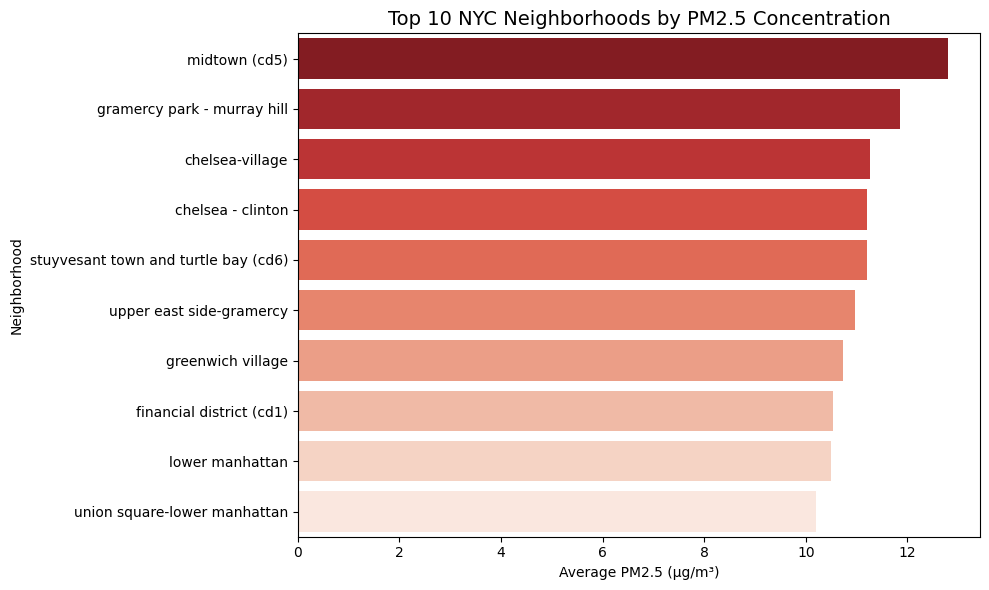

In [11]:
# Normalize neighborhood names: lowercase + strip
df['Geo Place Name'] = df['Geo Place Name'].str.strip().str.lower()

# Standardize inconsistent neighborhood names
df['Geo Place Name'] = df['Geo Place Name'].replace({
    'clinton and chelsea (cd4)': 'chelsea - clinton',
    'chelsea and clinton': 'chelsea - clinton',
    'chelsea–clinton': 'chelsea - clinton',  # different dash types
    'chelsea & clinton': 'chelsea - clinton',
    'greenwich village and soho': 'greenwich village',
     # Greenwich Village standardization
    'greenwich village and soho (cd2)': 'greenwich village',
    'greenwich village and soho': 'greenwich village',
    'greenwich village - soho': 'greenwich village',
    'greenwich village & soho': 'greenwich village',
    'greenwich village / soho': 'greenwich village'
    })

# Filter for key pollutants
key_pollutants = ['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']
df_pollutants = df[df['Name'].isin(key_pollutants)].copy()

# Group by neighborhood and pollutant to get average values
neighborhood_pollution = df_pollutants.groupby(['Geo Place Name', 'Name'])['Data Value'].mean().reset_index()

# Filter for top 10 most polluted neighborhoods by PM2.5
top10_pm25 = neighborhood_pollution[neighborhood_pollution['Name'] == 'Fine particles (PM 2.5)']
top10_pm25 = top10_pm25.sort_values(by='Data Value', ascending=False).head(10)

# Plot the top 10 neighborhoods with highest PM2.5 levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Data Value', y='Geo Place Name', data=top10_pm25, palette='Reds_r')

plt.title("Top 10 NYC Neighborhoods by PM2.5 Concentration", fontsize=14)
plt.xlabel("Average PM2.5 (µg/m³)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()



### Correlation Between PM2.5 and Asthma Emergency Visits

This scatter plot visualizes the relationship between average PM2.5 concentrations and asthma-related emergency department visits across NYC.

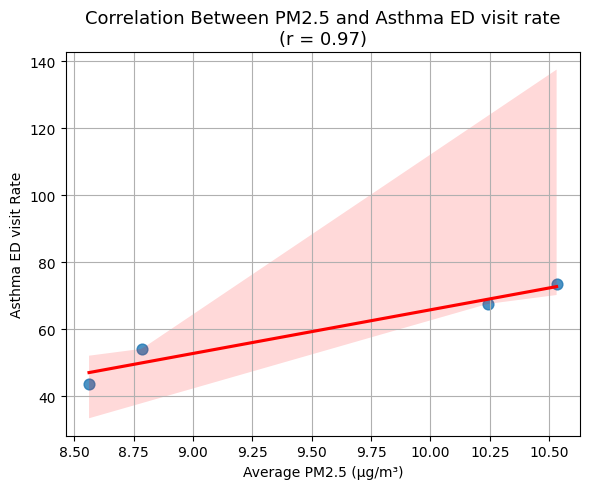

In [12]:
# Select relevant indicators: PM2.5 and asthma emergency visits due to PM2.5
selected_corr_vars = ['Fine particles (PM 2.5)','Asthma emergency department visits due to PM2.5']

# Filter and prepare data
corr_df = df[df['Name'].isin(selected_corr_vars)].copy()
corr_df['Year'] = corr_df['Start_Date'].dt.year

# Pivot to align both indicators by year
corr_wide = corr_df.pivot_table(index='Year', columns='Name', values='Data Value', aggfunc='mean').dropna()

# Calculate correlation coefficient
correlation_value = corr_wide.corr().iloc[0, 1]

# Plot regression
plt.figure(figsize=(6, 5))
sns.regplot(
    data=corr_wide,
    x='Fine particles (PM 2.5)',
    y='Asthma emergency department visits due to PM2.5',
    scatter_kws={"s": 60},
    line_kws={"color": "red"}
)

plt.title(f"Correlation Between PM2.5 and Asthma ED visit rate\n(r = {correlation_value:.2f})", fontsize=13)
plt.xlabel("Average PM2.5 (µg/m³)")
plt.ylabel("Asthma ED visit Rate")
plt.grid(True)
plt.tight_layout()
plt.show()
